        km  price
22   22899   7990
16   48235   6900
20   54000   7990
18   60949   7490
23   61789   8290
11   63060   6390
19   65674   7555
14   67000   6800
21   68500   7990
12   74000   6600
15   76025   6900
10   82029   6390
9    84000   6200
7    89000   5990
17   93000   6990
13   97500   6800
5   114800   5350
1   139800   3800
8   144500   5999
2   150500   4400
6   166800   5800
4   176000   5250
3   185530   4450
0   240000   3650


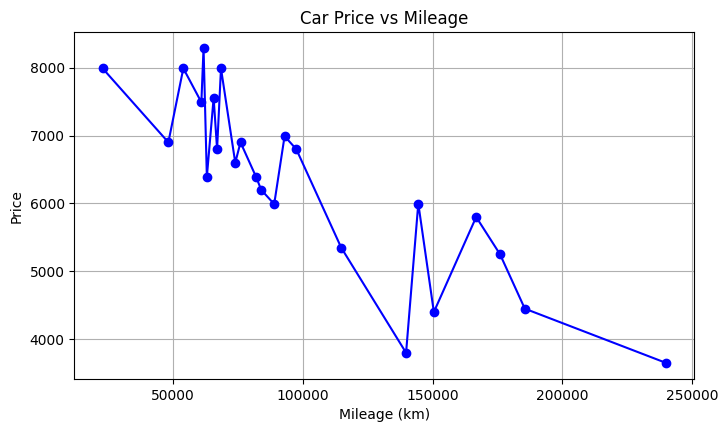

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    print(df)

    plt.figure(figsize=(8, 4.5))
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()
    

if __name__ == "__main__":
    main()

This is the print of the "data.csv".
I decided to use plt.plot to see the gradient.


[22899.0, 7990.0] | [48235.0, 6900.0] | [-0.04302178718029681, 8975.155904641617]
[48235.0, 6900.0] | [54000.0, 7990.0] | [0.18907198612315698, -2219.8872506504777]
[54000.0, 7990.0] | [60949.0, 7490.0] | [-0.0719527989638797, 11875.451144049504]
[60949.0, 7490.0] | [61789.0, 8290.0] | [0.9523809523809523, -50556.666666666664]
[61789.0, 8290.0] | [63060.0, 6390.0] | [-1.4948859166011015, 100657.50590086546]
[63060.0, 6390.0] | [65674.0, 7555.0] | [0.4456771231828615, -21714.399387911246]
[65674.0, 7555.0] | [67000.0, 6800.0] | [-0.5693815987933635, 44948.567119155356]
[67000.0, 6800.0] | [68500.0, 7990.0] | [0.7933333333333333, -46353.333333333336]
[68500.0, 7990.0] | [74000.0, 6600.0] | [-0.25272727272727274, 25301.818181818184]
[74000.0, 6600.0] | [76025.0, 6900.0] | [0.14814814814814814, -4362.962962962962]
[76025.0, 6900.0] | [82029.0, 6390.0] | [-0.0849433710859427, 13357.819786808794]
[82029.0, 6390.0] | [84000.0, 6200.0] | [-0.09639776763064434, 14297.412480974124]
[84000.0, 620

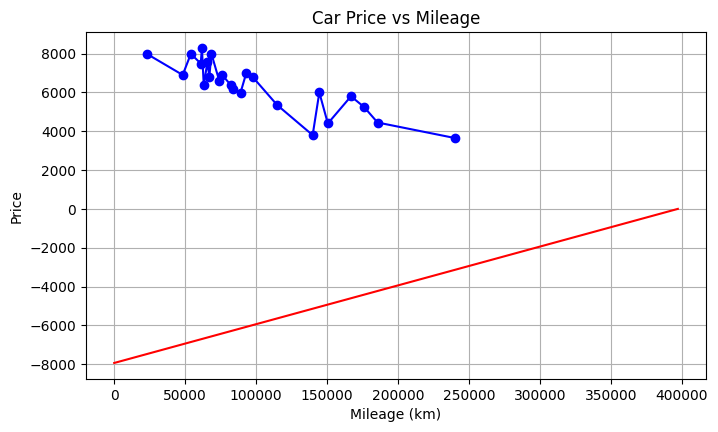

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(v1: list[float], v2: list[float]) -> tuple[float, float]:
    a = (v1[1] - v2[1]) / (v1[0] - v2[0])
    b = v1[1] - (a * v1[0])

    print(f"[{float(v1[0])}, {float(v1[1])}] | [{float(v2[0])}, {float(v2[1])}] | [{float(a)}, {float(b)}]")
    return (a, b)


def mean_affine(df: pd.DataFrame) -> tuple[float, float]:
    a = 0
    b = 0

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        ap, bp = calc_affine([x1, y1], [x2, y2])
        p = x1 - x2
        a += ap * p
        b += bp * p

    p = df['km'].min() - df['km'].max()
    a /= p
    b /= p

    print(float(a), float(b))

    return (a, b)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b = mean_affine(df)
    x_vals = [0.0, -b / a]
    y_vals = [b, 0.0]

    plt.figure(figsize=(8, 4.5))
    plt.plot(x_vals, y_vals, color='red', label=f'f(x) = {a:.4f}x + {b:.2f}')
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()
    

if __name__ == "__main__":
    main()